## Beysian Inferernce with the Posterior Distribution
----

The posterior distribution $p(\theta|D)$ embodies all available information about unknown parameter(s), $\theta$. When the number of parameters to be analyzed is relatively small, displaying graphs of all (marginal) posterior distributions may be sufficient to convey useful insights on the parameters to readers.

However, when we need to analyze many parameters, it is impractical and pointless to show all graphs on the parameters in an article or report. In practice, we calculate and report several "summary statistics" that show us key characteristics of the posterior distribution. We call them the <font color=red>posterior statistics</font>.

## Point Estimation
---

On many occasions, we need to report one particular value of the parameter we regard as the most plausible guess. This type of value is called an  <font color=red>estimate</font> and a procedure to obtain an estimate is called  <font color=red>point estimation</font>.

In Bayesian statistics, an estimate of the parameter is defined as a value that minimize the expected loss.

\begin{align*}
 \delta_\star
 &= \arg\min_{\delta}\mathrm{E}_{\theta}[L(\theta,\delta)|D] \\
 &= \arg\min_{\delta}\int_{\Theta}L(\theta,\delta)p(\theta|D)d\theta,
\end{align*}

where $L$ is the <font color=red>loss function</font> and $\Theta$ is a set of all possible values of $\theta$ (<font color=red>parameter space</font>).

| loss function  | $L(\theta,\delta)$        | point estimate
|:---------------|:-------------------------:|:------------------|
| quadratic loss | $(\theta-\delta)^2$       | posterior mean
| absolute loss  | $|\theta-\delta|$         | posterior median
| 0-1 loss       | $1-\mathbf{1}_\theta(\delta)$ | posterior mode

The following cell creates a figure of three loss functions where the ture valeu of $\theta$ is $\frac12$.

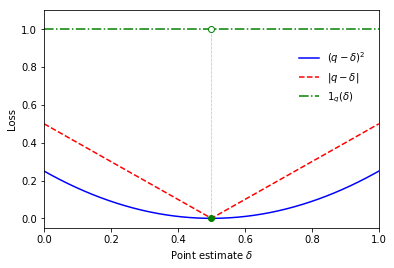

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
q = np.linspace(0, 1, 250)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(q, (q - 0.5)**2, 'b-', label='$(q-\\delta)^2$')
plt.plot(q, np.abs(q - 0.5), 'r--', label='$|q-\\delta|$')
plt.axhline(y=1, color='g', linestyle='-.', label='$1_{q}(\\delta)$')
plt.plot([0.5, 0.5], [0, 1], 'g:', linewidth=0.5)
plt.plot(0.5, 0, marker='o', mec='g', mfc='g')
plt.plot(0.5, 1, marker='o', mec='g', mfc='w')
plt.xlim(0, 1)
plt.ylim(-0.05, 1.1)
plt.xlabel('Point estimate $\\delta$')
plt.ylabel('Loss')
plt.legend(loc=(0.75, 0.55), frameon=False)
# plt.savefig('ms_fig_loss_function.png', dpi=300)
plt.show()

## Interval Estimation
---

1. <font color=red>Credible Interval (CI)</font> <br>
The credible interval of $\theta$ is an interval $[a_c, b_c]$ such that

  * $P(a_c \leqq \theta \leqq b_c|D) = 1-c$,
  * $P(\theta < a_c|D) = \frac{c}2$ and $P(\theta > b_c|D\} = \frac{c}2$.

2. <font color=red>Highest Posterior Density interval (HPDI)</font>

   The highest posterior density interval of $\theta$ is an interval $[a_c, b_c]$ such that

  * $P(a_c \leqq \theta \leqq b_c|D) = 1-c$,
  * for any pair $(\theta,\theta^{\prime})$ such that $\theta\in[a_c, b_c]$ and $\theta^{\prime}\notin [a_c, b_c]$, $p(\theta|D) > p(\theta^{\prime}|D)$ must hold.

   In particular, if the distribution is unimodal (it has the unique mode), the HPDI must satisfy

\begin{align*}
 P(a_c \leqq \theta \leqq b_c|D) &= 1-c, \\
 p(a_c|D) &= p(b_c|D).
\end{align*}

Here we import a module called `scipy.optimize`. It includes functions for numerical optimization.

In [2]:
import scipy.optimize as opt

`pandas` is a Python package for data analysis. `display` is used to show a Pandas dataframe in the Jupyter Notebook.

In [3]:
import pandas as pd
from IPython.display import display

The function `beta_hpdi` returns the HPD interval of the beta distribution. The nested function `hdpi_conditions` returns a vector such that

$$
 \begin{bmatrix}
 P(\theta\leqq b|D) - P(\theta \leqq a|D) - p \\
 p(a|D) - p(b|D)
 \end{bmatrix},
$$

where $p=1-c$ and $P(\theta\leqq b|D) - P(\theta \leqq a|D) = P(a \leqq \theta \leqq b|D)$.

So if we find a pair $[a, b]$ that makes the above vector equal to zero, such a pair is regarded as the 100p% HPDI. This is done by the function `root` in `scipy.optimize`.

A general syntax of `root` is as follows.
```Python
root(f, initial_value, arg=(arguments_of_f))
```
`root` finds a solution of `f`, i.e., a vector $x$ such that $f(x)=0$, by using a seach algorithm. `initial_value` is the starting point of the search algorithm. `arg` is a tuple containing arguments to be passed to `f`.

In [4]:
def beta_hpdi(ci0, alpha, beta, prob):
    def hpdi_conditions(v, a, b, p):
        eq1 = st.beta.cdf(v[1], a, b) - st.beta.cdf(v[0], a, b) - p
        eq2 = st.beta.pdf(v[1], a, b) - st.beta.pdf(v[0], a, b)
        return np.hstack((eq1, eq2))
    return opt.root(hpdi_conditions, ci0, args=(alpha, beta, prob)).x

The following cell computes the 90% confidence interval `ci` and the 90% highest posterior density interval `hpdi` of $\text{Beta}(2,5)$ as an illustration. `interval` is a method to compute the credible interval, which is already included in `scipy.stats`.

In [5]:
a = 2.0
b = 5.0
prob = 0.9
ci = st.beta.interval(prob, a, b)
hpdi = beta_hpdi(ci, a, b, prob)

`subplots` creates multiple panels for figures. Here it creates a $2\times 1$ matrix of figures. `ax2`, the second object `subplots` returns, is a list of objects on attributes of figures (plots, limits of axes, labels, legends, etc.) which can be set by the following methods:
+ `plot` creates a plot
+ `fill_between` fills two lines
+ `axhline` adds a horizontal line
+ `set_xlim` sets the lower and upper limit of the horizontal axis
+ `set_ylim` sets the lower and upper limit of the vertical axis
+ `set_xlabel` sets the label of the horizontal axis
+ `set_ylabel` sets the label of the vertical axis
+ `lagend` adds a legend

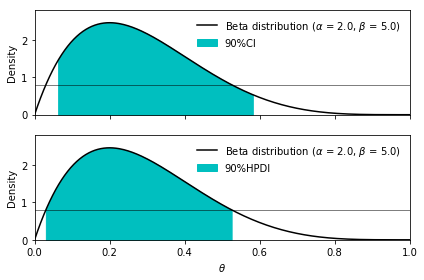

In [6]:
q = np.linspace(0, 1, 250)
qq = [np.linspace(ci[0], ci[1], 250), np.linspace(hpdi[0], hpdi[1], 250)]
label1 = 'Beta distribution ($\\alpha$ = {0:<3.1f}, $\\beta$ = {1:<3.1f})'.format(a, b)
label2 = ['CI', 'HPDI']
fig2, ax2 = plt.subplots(2, 1, sharex='all', sharey='all', num=2, facecolor='w')
ax2[1].set_xlim(0, 1)
ax2[1].set_ylim(0, 2.8)
ax2[1].set_xlabel('$\\theta$')
for index in range(2):
    plot_label = '{0:2.0f}%{1:s}'.format(100*prob, label2[index])
    ax2[index].plot(q, st.beta.pdf(q, a, b), 'k-', label=label1)
    ax2[index].fill_between(qq[index], st.beta.pdf(qq[index], a, b), color='c', label=plot_label)
    ax2[index].axhline(y=st.beta.pdf(hpdi[0], a, b), color='k', linestyle='-', linewidth=0.5)
    ax2[index].set_ylabel('Density')
    ax2[index].legend(loc='upper right', frameon=False)
plt.tight_layout()
# plt.savefig('ms_fig_ci_hpdi.png', dpi=300)
plt.show()

`bernoulli_stats` computes posterior statistics (mean, median, mode, standard deviation, CI, HPDI). The following are standard methods for descriptive statistics:

+ `interval` - interval
+ `mean` - mean
+ `median` - median
+ `std` - standard deviation (the square root of the variance)

`DataFrame` converts a matrix (NumPy 2D array) into a Pandas dataframe.

In [7]:
def bernoulli_stats(data, a0, b0, prob):
    n = data.size
    sum_data = data.sum()
    a = sum_data + a0
    b = n - sum_data + b0
    mean_pi = st.beta.mean(a, b)
    median_pi = st.beta.median(a, b)
    mode_pi = (a - 1.0) / (a + b - 2.0)
    sd_pi = st.beta.std(a, b)
    ci_pi = st.beta.interval(prob, a, b)
    hpdi_pi = beta_hpdi(ci_pi, a, b, prob)
    stats = np.hstack((mean_pi, median_pi, mode_pi, sd_pi, ci_pi, hpdi_pi))
    stats = stats.reshape((1, 8))
    stats_string = ['mean', 'median', 'mode', 'sd', 'ci (lower)', 'ci (upper)', 'hpdi (lower)', 'hpdi (upper)']
    param_string = ['$\\theta$']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, a, b

In the following cell, we generate 10 pseudo-random numbers from the Bernoulli distribution with $\theta=\frac12$ and compute the posterior statistics with `bernoulli_stats`.

In [8]:
p = 0.5
n = 10
a0 = 1.0
b0 = 1.0
np.random.seed(99)
data = st.bernoulli.rvs(p, size=n)
prob = 0.95
results, a, b = bernoulli_stats(data, a0, b0, prob)
display(results)

,mean,median,mode,sd,ci (lower),ci (upper),hpdi (lower),hpdi (upper)
$\theta$,0.5,0.5,0.5,0.138675,0.233794,0.766206,0.233794,0.766206


Note that three point estimats (mean, median, mode) are all identical. Furthermore the CI is also identical to the HPDI. This is because the posterior distribution is unimodal and symmetric around the mode.

## Bayes Factor
---

In statistics, either Bayesian or non-Bayesian, a hypothesis on the parameter(s) is a region or interval where the true value of the parameter is supposed to be located. In general, a hypothesis $H_i$ under which the true value of  $\theta$ is located in a region $S_i\subset\Theta$ is expressed as

\begin{equation*}
 H_i:\; \theta\in S_i, \quad i=0,1,2,\dots
\end{equation*}

In Bayesian statistics, plausibility of a hypothesis is measured by the posterior probability that the true value of $\theta$ is located in $S_i$, that is,

$$
 P(H_i|D) = P(\theta\in S_i|D) = \int_{S_i}p(\theta|D)d\theta.
$$

Competing hypotheses can be compared by the <font color=red>Bayes factor</font>, which is defined as

$$
 \text{Bayes factor} = \mathrm{B}_{ij}
 = \frac{P(H_i|D)}{P(H_j|D)}\div\frac{P(H_i)}{P(H_j)}
 = \frac{\text{Posterior odds ratio}}{\text{Prior odds ratio}}.
$$

| Rank | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bayes factor $\mathrm{B}_{ij}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Support for $H_j$ |
|:----:|:---------------------------------------------:|:-----------------------:|
|    0 | $0 < \log_{10}(\mathrm{B}_{ij})$              | Rejected                |
|    1 | $-\frac12 < \log_{10}(\mathrm{B}_{ij}) < 0$   | Barely worth mentioning |
|    2 | $ -1 < \log_{10}(\mathrm{B}_{ij}) < -\frac12$ | Substantial             |
|    3 | $-\frac32< \log_{10}(\mathrm{B}_{ij}) < -1$   | Strong                  |
|    4 | $-2 < \log_{10}(\mathrm{B}_{ij}) < -\frac32$  | Very strong             |
|    5 | $\log_{10}(\mathrm{B}_{ij}) < -2$             | Decisive                |

We want to check whether the true value of $\theta$ is more than 50% or not, i.e.,

$$
 \begin{cases}
 H_0:\ & \theta \leqq 0.5; \\
 H_1:\ & \theta > 0.5.
 \end{cases}
$$

When $\theta$ is the true vote share of a candidate, supporting $H_1$ implies that this candidate won the election.

Suppose the true $\theta$ is 60% and we generate 500 observation from the Beroulli distribution with $\theta=60\%$.

In [9]:
p = 0.6
n = 500
a0 = 1.0
b0 = 1.0
np.random.seed(99)
data = st.bernoulli.rvs(p, size=n)
y = np.sum(data)
a_star = y + a0
b_star = n - y + b0
Prior_odds = st.beta.cdf(0.5, a0, b0) / (1.0 - st.beta.cdf(0.5, a0, b0))
Posterior_odds = st.beta.cdf(0.5, a_star, b_star) / (1.0 - st.beta.cdf(0.5, a_star, b_star))
Bayes_factor = Posterior_odds / Prior_odds
print([np.log10(Prior_odds), np.log10(Posterior_odds), np.log10(Bayes_factor)])

[0.0, -3.474580539092309, -3.474580539092309]


In this example, the prior odds ratio is 1. So the Bayes factor is identital to the posterior odds ratio. The Bayes factor suggests that $H_1$ is decisively supported by the evidence. Thus we can safely call the election for this candidate.

## Savage-Dickey Density Ratio
---

The <font color=red>Savage-Dickey density ratio</font> (<font color=red>SDDR</font>) is the Bayes factor specifically designed for 

$$
 \begin{cases}
 H_0:\ & \theta = \theta_0; \\
 H_1:\ & \theta \ne \theta_0.
 \end{cases}
$$

The SDDR is based on the spike-and-slab prior:

$$
 p(\theta) = p_0 \delta(\theta-\theta_0) + (1-p_0)f(\theta),\quad 0 < p_0 < 1,
$$

where the choice of $p_0$ is arbitrary. The SDDR is given by

$$
 \mathrm{B}_{01} = \frac{f(\theta_0|D)}{f(\theta_0)},
$$

where $f(\theta|D)$ is the posterior distribution when $\theta\ne\theta_0$, i.e.,

$$
 f(\theta|D)= \frac{p(D|\theta)f(\theta)}{\int_{\Theta}p(D|\theta)f(\theta)d\theta}.
$$

As an illustration, we test the following hypotheses 

$$
 \begin{cases}
 H_0:\ & \theta = 0.5; \\
 H_1:\ & \theta \ne 0.5.
 \end{cases}
$$

with the SDDR. We use $\text{Beta}(1,1)$ (the uniform distribution between 0 and 1) as $f$ in the spike-and-slab prior.

In [10]:
SDDR = st.beta.pdf(0.5, a_star, b_star)
print(np.log10(SDDR))

-1.261090030594163


The SDDR suggests that $H_1$ is strongly supported. So we may conclude that the true value of $\theta$ is not equal to 50%.